In [4]:
# Import Libraries
import numpy as np
import pandas as pd
import sklearn
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import fetch_openml

In [3]:
# Import the MNIST Dataset
mnist = fetch_openml('mnist_784', version=1)

In [5]:
# Show the keys in the dataset
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [6]:
# We want to grab the data and the target as X and y, respectively.
X,y = mnist["data"], mnist["target"]

# Check the size of X
X.shape

(70000, 784)

In [7]:
# Check the size of y
y.shape

(70000,)

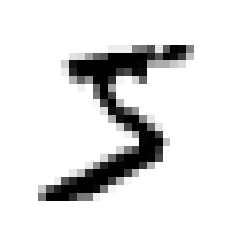

In [13]:
# Let's visualize one
some_digit = X.loc[0].array
some_digit_image = some_digit.reshape(28,28)

plt.imshow(some_digit_image, cmap="binary")
plt.axis('off')
plt.show()

In [18]:
# Check the y
y[0]

'5'

In [19]:
# Since y is a string, convert it to an integer.
y = y.astype(np.uint8)

In [20]:
# Check that y is an integer.
y[0]

5

In [21]:
# The MNIST dataset is already split into a training set and test set (first 60,000 images and last 10,000, respectively).
# The training set is already shuffled for us, which guarantees that all cross-validation folds will be similar (we don't want one fold to be missing some digits)

X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

# Binary Classifier

In [22]:
# Let's simplify the problem and identify one digit - ex/ 5 - binary classifier - 5 and not 5
# Create the target vectors for this classification
y_train_5 = (y_train == 5 ) # True for all 5s, False for all other digits
y_test_5 = (y_test == 5 )

In [23]:
# Let's first examine the Stocastic Gradient Descenet (SGD) Classifier
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier()
sgd_clf.fit (X_train, y_train_5)

SGDClassifier()

In [24]:
# Let's see if it detects our number 5 correctly. The output should be 'True'
sgd_clf.predict([some_digit])

/Users/gloriahwoang/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([ True])

In [25]:
# Performance Measures - Cross-Validation
# Let's use the cross_val_score function to evaluate our model using K-fold cross-validation with three folds
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.96745, 0.96835, 0.96465])

Very good! all above 96%. But we are not happy too soon bc in this kind of dataset, only about 10% or less of the images are 
actually 5s. So if you guess that an image is not a 5, you will be right about 90% of the time. So accuracy is not the 
preferred measure of performance for classifiers, esp. when you are dealing with skewed datasets like these.

A better way to evaluate might be a confusion matrix.

In [26]:
# Let's get a set of predictions first - the cross_val_predict returns the predictions made on each test fold.
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict (sgd_clf, X_train, y_train_5, cv=3)

In [27]:
# Now let's grab the confusion matrix with our predictions
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

array([[53450,  1129],
       [ 1259,  4162]])

53450 True Negatives

1129 False Positives

1259 False Negatives

4162 True Positives

Precision = 4162 / (4162 + 1129) = 0.7866

Recall = 4162 / (4162 + 1259) = 0.7677

In [28]:
from sklearn.metrics import precision_score, recall_score
print('The Precision Score is: ', precision_score(y_train_5, y_train_pred))
print('The Recall Score is: ', recall_score(y_train_5, y_train_pred))

The Precision Score is:  0.7866187866187866
The Recall Score is:  0.7677550267478325


In [29]:
from sklearn.metrics import f1_score
f1_score(y_train_5,y_train_pred)

0.7770724421209858

# KNN Classification

In [52]:
# Import Libraries

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, plot_confusion_matrix
from sklearn.model_selection import GridSearchCV

In [53]:
from tqdm import tqdm
%%time

# Grid Search Part 1

knn = KNeighborsClassifier()
k_range = list(range(1, 25))
param_grid = dict(n_neighbors=k_range)
  
# defining parameter range
grid = GridSearchCV(knn, param_grid, cv=3, scoring='accuracy', return_train_score=True,verbose=1)
  
# fitting the model for grid search
grid_search = grid.fit(X_train, y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


In [54]:
print(grid_search.best_params_)

{'n_neighbors': 3}


In [55]:
accuracy = grid_search.best_score_ *100
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(accuracy) )

Accuracy for our training dataset with tuning is : 96.82%


Can we do better? Let's search for better k value.

In [58]:
# Grid Search Part 2
%time

knn = KNeighborsClassifier()
k_range_2 = list(range(26, 40))
param_grid_2 = dict(n_neighbors=k_range_2)
  
# defining parameter range
grid_2 = GridSearchCV(knn, param_grid_2, cv=3, scoring='accuracy', return_train_score=True,verbose=1)
  
# fitting the model for grid search
grid_search_2 = grid_2.fit(X_train, y_train)

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 4.05 µs
Fitting 3 folds for each of 14 candidates, totalling 42 fits


In [59]:
print(grid_search_2.best_params_)
accuracy_2 = grid_search_2.best_score_ *100
print("Accuracy for our training dataset with tuning part 2 is : {:.2f}%".format(accuracy_2) )

{'n_neighbors': 26}
Accuracy for our training dataset with tuning part 2 is : 95.36%


In [61]:
# Check Accuracy on Test Data with k=3
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X, y)
y_test_hat=knn.predict(X_test) 
test_accuracy=accuracy_score(y_test,y_test_hat)*100
print("Accuracy for our testing dataset with tuning is : {:.2f}%".format(test_accuracy) )

Accuracy for our testing dataset with tuning is : 98.66%


/Users/gloriahwoang/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


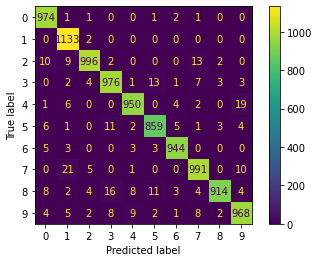

In [63]:
plot_confusion_matrix(grid,X_test, y_test,values_format='d' )